# Customer Segmentation using Hierarchical Clustering

source: https://www.analyticsvidhya.com/blog/2019/05/beginners-guide-hierarchical-clustering/

source: https://analyticsindiamag.com/comparison-of-k-means-hierarchical-clustering-in-customer-segmentation/

## Mall customers segmentation

Imagine a mall which has recorded the details of **200** of its **customers** through a membership campaign. Now, it has information about customers, including their gender, age, annual income and a **spending score**. This spending score is given to customers based on their past spending habits from purchases they made from the mall.

* Now, suppose the mall is **launching a luxurious product** and wants **to reach out to potential customers** who can buy it. 
* Approaching every customer will take a lot of time and will be an expensive exercise. 
* Hence, using the information on customers, the mall may want to `segregate customers who have the potential to buy a luxurious product`. 
* This problem can be addressed through clustering, where we can place customers into different segments and identify potential customers.

We can represent the customer on a two-dimensional Euclidean space where X-axis will represent the annual income of customers, and Y-axis will represent the spending score of customers. 
* After representing each of the customers on this plane, using a clustering technique, we can form the **groups of customers**. 
* Now, on the basis of their income and spending score, we can `identify the group of customers who have the potential to buy a luxurious product`. 

Now, we are going to implement the K-Means clustering technique in segmenting the customers, follow the steps below:

1. Import the basic libraries to read the CSV file and visualize the data

In [5]:
import matplotlib.pyplot as plt
import pandas as pd

2. Read the dataset that is in a CSV file. Define the dataset for the model

In [6]:
dataset = pd.read_csv('https://raw.githubusercontent.com/lucko515/clustering-python/master/Customer%20in%20Mall%20clusterng/Mall_Customers.csv')
X = dataset.iloc[:, [3, 4]].values
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


3. In K-Means, the number of optimal clusters was found using the elbow method. In hierarchical clustering, the dendrograms are used for this purpose. The below lines of code plot a dendrogram for our dataset.

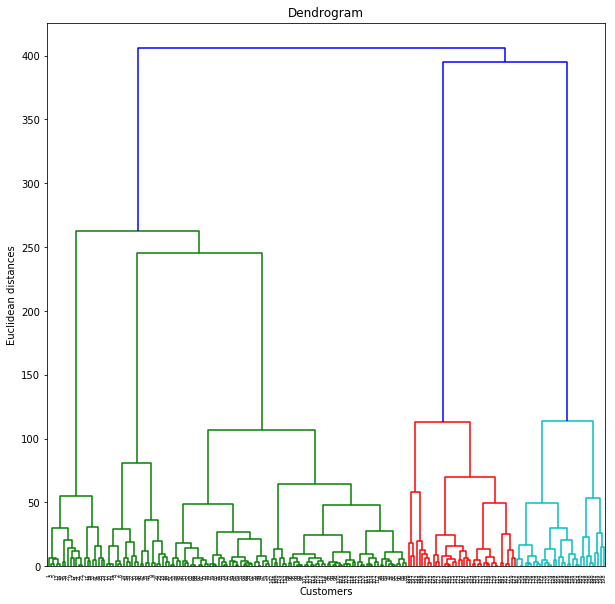

In [7]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(10,10))
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

The combination of 5 lines are not joined on the Y-axis from 100 to 240, for about 140 units. So, `the optimal number of clusters will be 5 for hierarchical clustering`. 

4. Now we train the hierarchical clustering algorithm and predict the cluster for each data point.

The `Agglomerative Clustering` class will require two inputs:

* __n_clusters__: The number of clusters to form as well as the number of centroids to generate. 
* __linkage__: The linkage criterion determines which __distance__ to use between sets of observation.  
  ‘`ward`’ minimizes the variance of the clusters being merged.


In [8]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5, linkage = 'ward')
y_hc = hc.fit_predict(X)

5. Once the algorithm predicts the cluster for each of the data points, it can be visualized now.

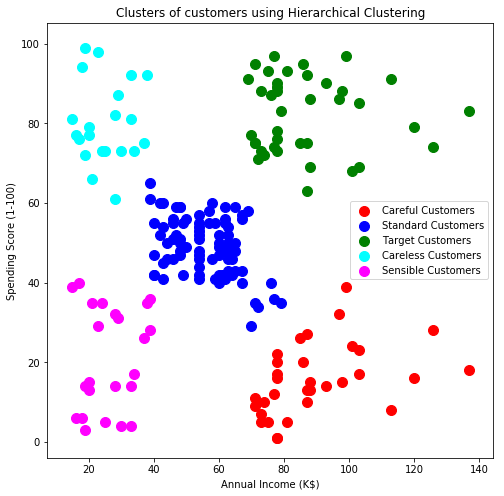

In [9]:
# Visualising the clusters

plt.figure(figsize=(8,8))
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Careful Customers')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Standard Customers')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Target Customers')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 100, c = 'cyan', label = 'Careless Customers')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 100, c = 'magenta', label = 'Sensible Customers')
plt.title('Clusters of customers using Hierarchical Clustering')
plt.xlabel('Annual Income (K$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

The **name of clusters** is given based on their income and spending.  
For example, 
* when referring to a customer with low income and high spending, we have used cyan colour. 
* This group indicates ‘`Careless Customer`’ since despite having a low income, they spend more. 
* **To sell a luxurious product**, a person with `high income and high spending habits` should be targeted. This group of customers is represented in magenta colour in the above diagram.


 6. Now we can select the customers belonging to the target cluster (**Target Customers**)

In [10]:
dataset[hc.labels_ == 2]

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
123,124,Male,39,69,91
125,126,Female,31,70,77
127,128,Male,40,71,95
129,130,Male,38,71,75
131,132,Male,39,71,75
133,134,Female,31,72,71
135,136,Female,29,73,88
137,138,Male,32,73,73
139,140,Female,35,74,72
141,142,Male,32,75,93


# Wholesale customer segmentation
We will be working on a wholesale customer segmentation problem. 
* You can download the dataset using [this link](https://archive.ics.uci.edu/ml/machine-learning-databases/00292/Wholesale%20customers%20data.csv). 
* The data is hosted on the UCI Machine Learning repository. 
* The **aim** of this problem is to `segment the clients of a wholesale distributor` based on their `annual spending` on diverse product categories, like milk, grocery, region, etc.

Let’s explore the data first and then apply **Hierarchical Clustering** to segment the clients.

We will first import the required libraries:

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Load the data and look at the first few rows:

In [12]:
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00292/Wholesale%20customers%20data.csv')
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
Channel             440 non-null int64
Region              440 non-null int64
Fresh               440 non-null int64
Milk                440 non-null int64
Grocery             440 non-null int64
Frozen              440 non-null int64
Detergents_Paper    440 non-null int64
Delicassen          440 non-null int64
dtypes: int64(8)
memory usage: 27.6 KB


There are multiple product categories – Fresh, Milk, Grocery, etc. 
* The values represent the number of units purchased by each client for each product. 
* **Our aim** is to make clusters from this data that can `segment similar clients together`. 
* We will, of course, use Hierarchical Clustering for this problem.

But before applying Hierarchical Clustering, we have to **normalize** the data so that the scale of each variable is the same.  
Why is this important?  
Well, if the scale of the variables is not the same, the model might become biased towards the variables with a higher magnitude like Fresh or Milk (refer to the above table).

So, let’s first normalize the data and bring all the variables to the same scale:

In [30]:
from sklearn.preprocessing import normalize
data_scaled = normalize(data)

# from sklearn.preprocessing import StandardScaler
# stscaler = StandardScaler().fit(data)
# data_scaled = stscaler.transform(data)

data_scaled = pd.DataFrame(data_scaled, columns=data.columns)
data_scaled.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.000112,0.000168,0.708333,0.539874,0.422741,0.011965,0.149505,0.074809
1,0.000125,0.000188,0.442198,0.614704,0.599540,0.110409,0.206342,0.111286
2,0.000125,0.000187,0.396552,0.549792,0.479632,0.150119,0.219467,0.489619
3,0.000065,0.000194,0.856837,0.077254,0.272650,0.413659,0.032749,0.115494
4,0.000079,0.000119,0.895416,0.214203,0.284997,0.155010,0.070358,0.205294


Here, we can see that the scale of all the variables is almost similar. Now, we are good to go. 

## How should we Choose the Number of Clusters in Hierarchical Clustering?

Let’s first draw the **dendrogram** to help us `decide the number of clusters` for this particular problem:

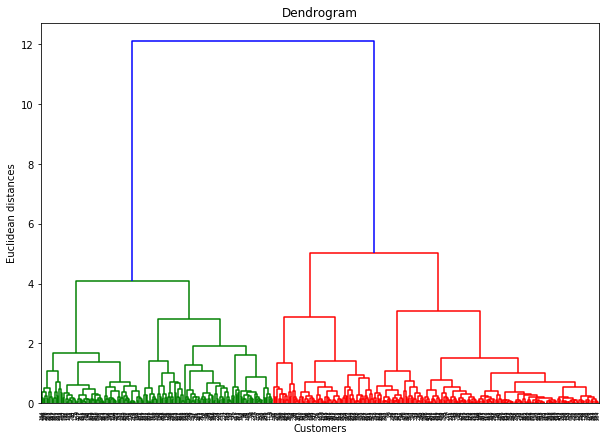

In [31]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7)) 
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))
plt.show()

The x-axis contains the samples and y-axis represents the distance between these samples. 
* The vertical line with **maximum distance** is the blue line and hence we can decide a threshold of 6 and cut the dendrogram. So, `the optimal number of clusters will be 2 for hierarchical clustering`. 
* The **number of clusters** will be the `number of vertical lines which are being intersected by the line drawn using the threshold`. 
* In our example, since the red line intersects 2 vertical blue lines, we will have 2 clusters. 

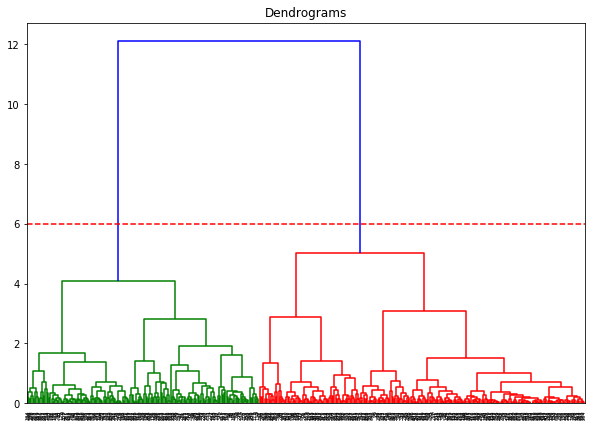

In [32]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))
plt.axhline(y=6, color='r', linestyle='--')

We have two clusters as this line cuts the dendrogram at two points. 

Let’s now apply hierarchical clustering for 2 clusters:

In [33]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
cluster.fit_predict(data_scaled)

array([1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,

We can see the values of 0s and 1s in the output since we defined 2 clusters. 0 represents the points that belong to the first cluster and 1 represents points in the second cluster. Let’s now visualize the two clusters:

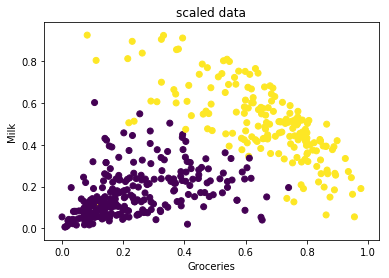

In [34]:
x = data_scaled['Grocery']
y = data_scaled['Milk']

plt.scatter(x,y,c=cluster.labels_)
plt.title('scaled data')
plt.xlabel("Groceries")
plt.ylabel("Milk")
plt.show()

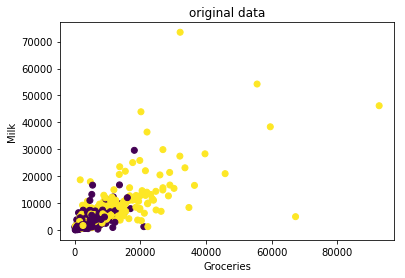

In [35]:
x = data['Grocery']
y = data['Milk']

plt.scatter(x,y,c=cluster.labels_)
plt.title('original data')
plt.xlabel("Groceries")
plt.ylabel("Milk")
plt.show()

Awesome! We can clearly visualize the two clusters here. This is how we can implement hierarchical clustering in Python.

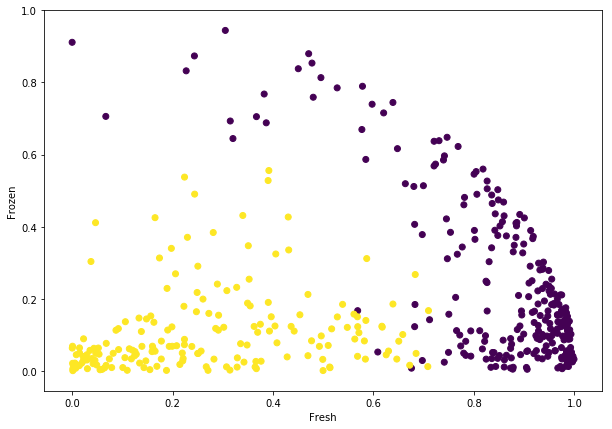

In [20]:
fig = plt.figure(figsize=(10, 7))
plt.xlabel("Fresh")
plt.ylabel("Frozen")
plt.scatter(data_scaled['Fresh'], data_scaled['Frozen'], c=cluster.labels_) 

In [27]:
# cluster 0
data_scaled[cluster.labels_ == 0]

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
3,0.000065,0.000194,0.856837,0.077254,0.272650,0.413659,0.032749,0.115494
4,0.000079,0.000119,0.895416,0.214203,0.284997,0.155010,0.070358,0.205294
6,0.000136,0.000204,0.824476,0.217508,0.474247,0.032636,0.213496,0.037056
11,0.000142,0.000214,0.936369,0.080061,0.322166,0.101144,0.039104,0.035401
12,0.000055,0.000083,0.873065,0.339134,0.323662,0.007901,0.106841,0.080688
13,0.000072,0.000108,0.765560,0.223999,0.540586,0.111675,0.242004,0.021722
14,0.000068,0.000101,0.833939,0.320173,0.409003,0.009945,0.171097,0.073337
15,0.000090,0.000271,0.927421,0.100765,0.345623,0.035910,0.087197,0.037267
18,0.000089,0.000133,0.823138,0.279985,0.446904,0.097576,0.122446,0.140767
19,0.000078,0.000235,0.608706,0.195208,0.740461,0.052342,0.197008,0.039198


In [26]:
# cluster 1
data_scaled[cluster.labels_ == 1]

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.000112,0.000168,0.708333,0.539874,0.422741,0.011965,0.149505,0.074809
1,0.000125,0.000188,0.442198,0.614704,0.599540,0.110409,0.206342,0.111286
2,0.000125,0.000187,0.396552,0.549792,0.479632,0.150119,0.219467,0.489619
5,0.000146,0.000218,0.684944,0.600972,0.372997,0.048462,0.130615,0.105583
7,0.000145,0.000217,0.548036,0.358368,0.681593,0.120685,0.240141,0.185547
8,0.000105,0.000315,0.625457,0.382637,0.649477,0.044578,0.179991,0.078667
9,0.000083,0.000125,0.250143,0.462010,0.786371,0.048271,0.309242,0.087379
10,0.000122,0.000184,0.206006,0.330675,0.794036,0.269289,0.365805,0.106736
16,0.000127,0.000191,0.064876,0.560736,0.770948,0.008523,0.286728,0.068693
17,0.000099,0.000297,0.582005,0.609838,0.290507,0.083101,0.036648,0.443536
